In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn.metrics import r2_score as r2 
import datetime, warnings
warnings.filterwarnings('ignore')

c:\Users\Steven\Desktop\school github repos\svo-directed-practicum\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Open the pickle file
predictions = pickle.load(open('../../output/predictions_overall.pkl', 'rb'))

In [3]:
predictions

,date,ticker,Actual,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,hour_of_day_9,...,Predicted (NeuralNet) (all),Predicted (LightGBM) (time_only),Predicted (LightGBM) (sentiment_only),Predicted (LightGBM) (self_finance_only),Predicted (LightGBM) (finance_only),Predicted (LightGBM) (finance_time),Predicted (LightGBM) (all),Predicted (LightGBM) (all_tuned),Predicted (LightGBM) (all_tuned_retrained),Predicted Baseline
270230,2023-12-04 12:45:00,AAL,1293240,0,0,1,0,0,0,0,...,1.062676e+06,2.166145e+05,853039.208070,1.466402e+06,1.467144e+06,1.444167e+06,1.398818e+06,1.273039e+06,1.385569e+06,7.383612e+05
270231,2023-12-04 12:45:00,ALGT,1447,0,0,1,0,0,0,0,...,9.692740e+03,2.166145e+05,117560.899842,3.084344e+03,2.405521e+03,5.587949e+03,3.406106e+03,1.775199e+03,3.620900e+03,3.645261e+04
270232,2023-12-04 12:45:00,ALK,587333,0,0,1,0,0,0,0,...,1.615639e+05,2.166145e+05,657044.943388,3.758347e+05,4.132884e+05,3.735391e+05,3.653477e+05,3.965052e+05,3.878293e+05,5.854156e+04
270233,2023-12-04 12:45:00,DAL,94989,0,0,1,0,0,0,0,...,1.294410e+05,2.166145e+05,276890.669042,1.747686e+05,1.862419e+05,1.748006e+05,1.693648e+05,1.612089e+05,1.758026e+05,1.630350e+05
270234,2023-12-04 12:45:00,JBLU,273608,0,0,1,0,0,0,0,...,3.706713e+05,2.166145e+05,830606.119024,5.119678e+05,5.256118e+05,4.896124e+05,4.796478e+05,4.580689e+05,4.958197e+05,3.710743e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337783,2025-05-30 15:45:00,ALK,440444,0,0,0,0,0,1,0,...,7.893551e+05,1.063072e+06,205925.448478,3.283563e+05,3.981022e+05,5.539017e+05,5.802983e+05,5.299487e+05,4.925179e+05,3.536582e+05
337784,2025-05-30 15:45:00,DAL,1245698,0,0,0,0,0,1,0,...,9.146906e+05,1.063072e+06,376416.982429,1.007004e+06,1.023123e+06,1.061786e+06,1.058074e+06,1.242038e+06,1.076072e+06,1.396871e+06
337785,2025-05-30 15:45:00,JBLU,8400782,0,0,0,0,0,1,0,...,4.472642e+06,1.063072e+06,285688.984920,3.415540e+06,3.235173e+06,3.590649e+06,3.451630e+06,3.598861e+06,3.577430e+06,2.834063e+06
337786,2025-05-30 15:45:00,LUV,2026886,0,0,0,0,0,1,0,...,2.007167e+06,1.063072e+06,316754.581946,1.256809e+06,1.268855e+06,1.217692e+06,1.229052e+06,1.449506e+06,1.282050e+06,1.323023e+06


In [7]:
predictions.drop(columns=[i for i in predictions.columns if 'Predicted' in i and 'all_tuned_retrained' not in i and 'Baseline' not in i], inplace=True)
predictions.rename(columns={
    'Predicted (LightGBM) (all_tuned_retrained)': 'Predicted',
    'Predicted Baseline': 'Baseline'
    }, inplace=True)
predictions

,date,ticker,Actual,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,hour_of_day_9,...,month_of_year_7,month_of_year_8,month_of_year_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,Predicted,Baseline
270230,2023-12-04 12:45:00,AAL,1293240,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1.385569e+06,7.383612e+05
270231,2023-12-04 12:45:00,ALGT,1447,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,3.620900e+03,3.645261e+04
270232,2023-12-04 12:45:00,ALK,587333,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,3.878293e+05,5.854156e+04
270233,2023-12-04 12:45:00,DAL,94989,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1.758026e+05,1.630350e+05
270234,2023-12-04 12:45:00,JBLU,273608,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,4.958197e+05,3.710743e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337783,2025-05-30 15:45:00,ALK,440444,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,4.925179e+05,3.536582e+05
337784,2025-05-30 15:45:00,DAL,1245698,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1.076072e+06,1.396871e+06
337785,2025-05-30 15:45:00,JBLU,8400782,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,3.577430e+06,2.834063e+06
337786,2025-05-30 15:45:00,LUV,2026886,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1.282050e+06,1.323023e+06


In [53]:
predictions['Residual'] = predictions['Actual'] - predictions['Predicted']
predictions['Residual Baseline'] = predictions['Actual'] - predictions['Baseline']
predictions['Absolute Percent Error'] = np.abs(predictions['Residual'] / predictions['Actual'])
predictions['Absolute Percent Error Baseline'] = np.abs(predictions['Residual Baseline'] / predictions['Actual'])
predictions['time'] = predictions['date'].dt.time
# format time to be HH:MM
predictions['time'] = predictions['time'].apply(lambda x: x.strftime('%H:%M'))

<Axes: xlabel='None', ylabel='Actual'>

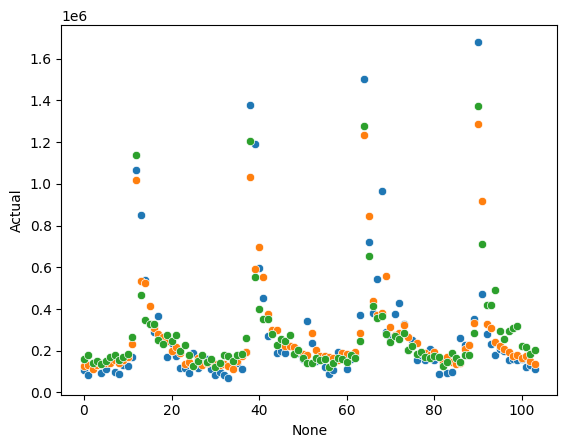

In [19]:
plot_data = predictions[predictions['ticker']=='UAL'][:104].reset_index(drop=True)
sns.scatterplot(data=plot_data, x=plot_data.index, y='Actual', alpha=1)
sns.scatterplot(data=plot_data, x=plot_data.index, y='Predicted', alpha=1)
sns.scatterplot(data=plot_data, x=plot_data.index, y='Baseline', alpha=1)

<Axes: xlabel='None', ylabel='Residual'>

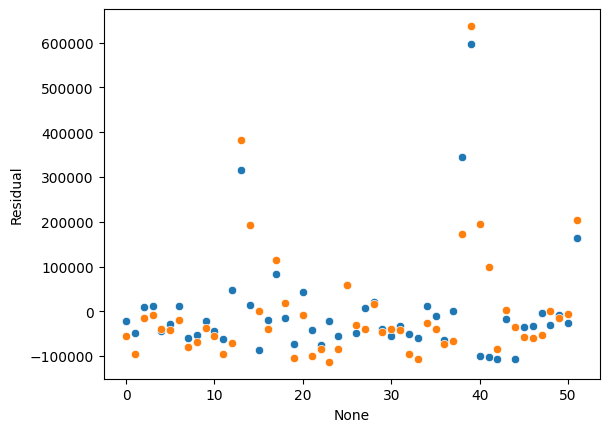

In [20]:
plot_data = predictions[predictions['ticker']=='UAL'][:52].reset_index(drop=True)
sns.scatterplot(data=plot_data, x=plot_data.index, y='Residual', alpha=1)
sns.scatterplot(data=plot_data, x=plot_data.index, y='Residual Baseline', alpha=1)

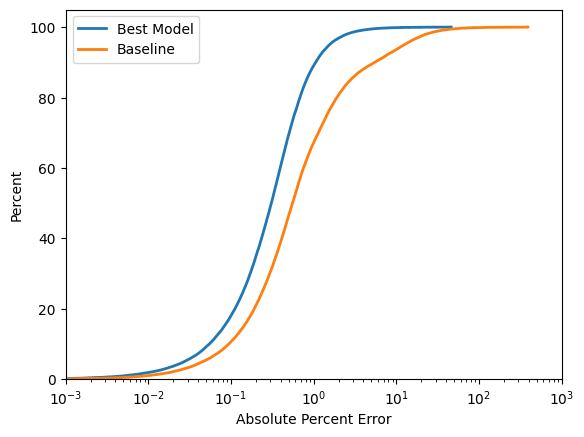

In [73]:
sns.ecdfplot(
    data=predictions, 
    x='Absolute Percent Error', 
    log_scale=True, 
    alpha=1, 
    stat = 'percent',
    label='Best Model',
    linewidth=2
   )

sns.ecdfplot(
    data=predictions,
    x='Absolute Percent Error Baseline', 
    log_scale=True, 
    alpha=1, 
    stat = 'percent',
    label='Baseline',
    linewidth=2
  )

plt.xlim(1e-3, 1e3)
plt.legend()
plt.savefig('../../output/absolute_percent_error_distribution.png', dpi=600)

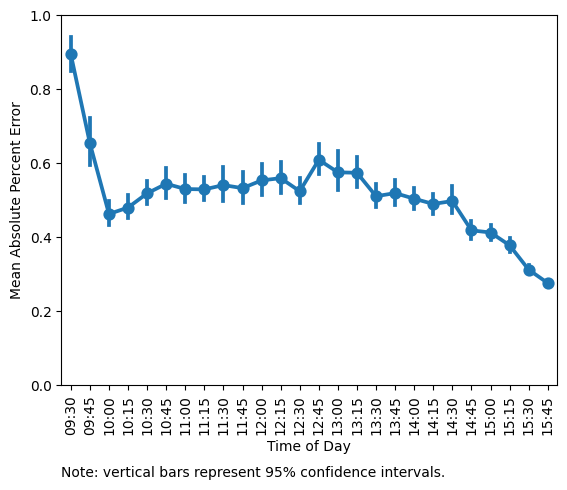

In [86]:
# MAPE by time of day
predictions.sort_values(by=['time','ticker'], inplace=True)

sns.pointplot(
    data=predictions,
    x='time',
    y='Absolute Percent Error',
    n_boot=10000
)

plt.ylim(0, 1)
plt.ylabel('Mean Absolute Percent Error')
plt.xlabel('Time of Day')
plt.xticks(rotation=90)
plt.annotate('Note: vertical bars represent 95% confidence intervals.',
             xy=(0.0, -0.25), 
             xycoords='axes fraction', 
             ha='left', 
             fontsize=10)
plt.savefig('../../output/mape_by_time.png', dpi=600)

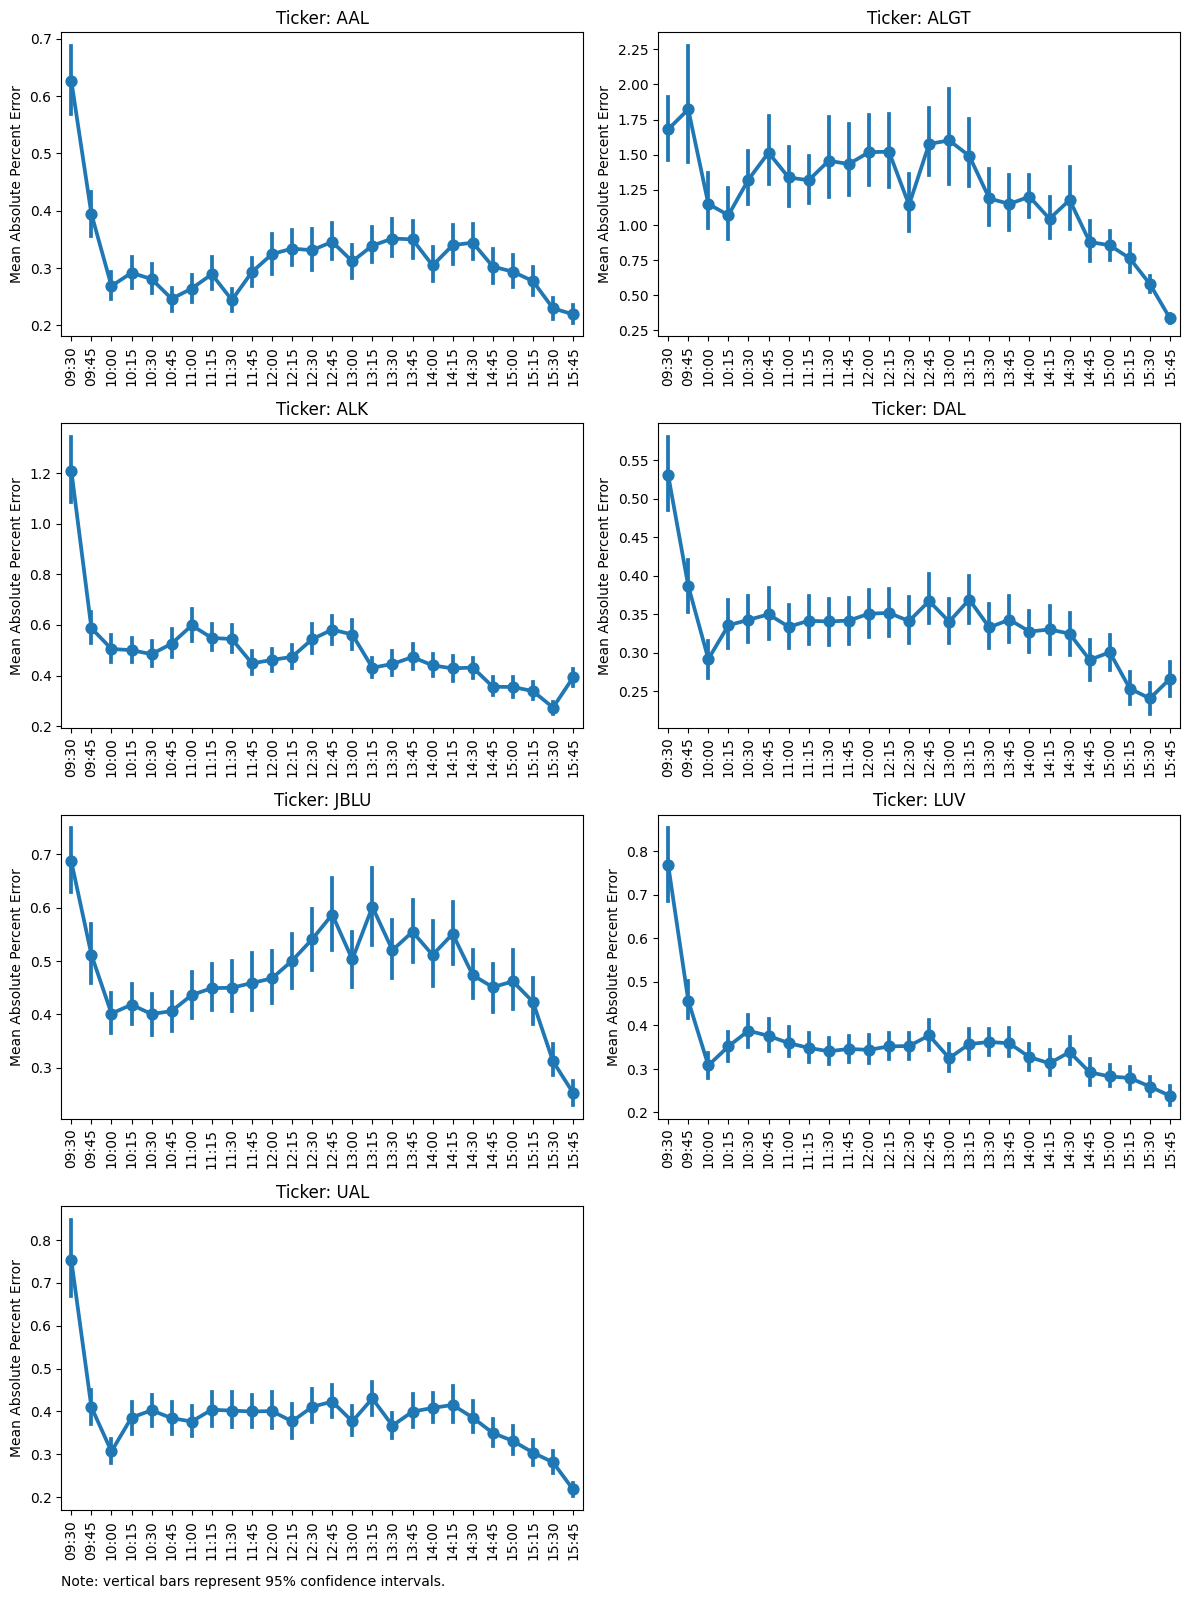

In [87]:
# MAPE by time of day and ticker
import math
tickers = predictions['ticker'].unique()
n_tickers = len(tickers)
n_cols = 2
n_rows = math.ceil(n_tickers / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten() if n_tickers > 1 else [axes]

for i, ticker in enumerate(tickers):
    ax = axes[i]
    data = predictions[predictions['ticker'] == ticker].sort_values(by='time')
    sns.pointplot(
        data=data,
        x='time',
        y='Absolute Percent Error',
        ax=ax
    )
    #ax.set_ylim(0, 2)
    ax.set_ylabel('Mean Absolute Percent Error')
    ax.set_xlabel('')
    ax.set_title(f"Ticker: {ticker}")
    ax.tick_params(axis='x', rotation=90)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.annotate('Note: vertical bars represent 95% confidence intervals.',
                xy=(0.0, -0.25), 
                xycoords='axes fraction', 
                ha='left', 
                fontsize=10)

plt.tight_layout()
plt.savefig('../../output/mape_by_time_by_ticker.png', dpi=600)

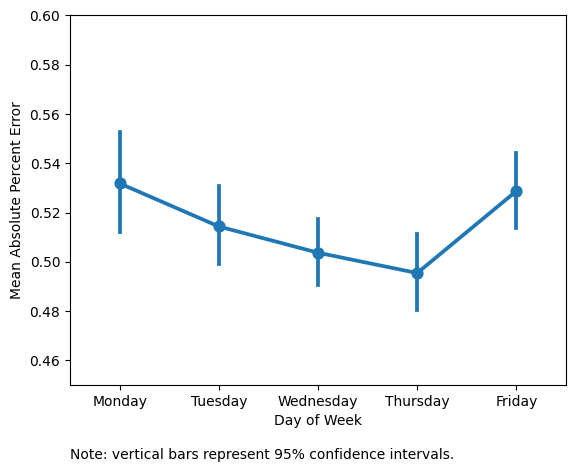

In [ ]:
# MAPE by day of week
predictions['day_of_week'] = predictions['date'].dt.day_name()
predictions['day'] = predictions['date'].dt.dayofweek
predictions.sort_values(by=['day','ticker'], inplace=True)

sns.pointplot(
    data=predictions,
    x='day_of_week',
    y='Absolute Percent Error',
    n_boot=10000
)

plt.ylim(0.45, 0.6)
plt.ylabel('Mean Absolute Percent Error')
plt.xlabel('Day of Week')
plt.xticks(rotation=0)
plt.annotate('Note: vertical bars represent 95% confidence intervals.',
             xy=(0.0, -0.2), 
             xycoords='axes fraction', 
             ha='left', 
             fontsize=10)
plt.savefig('../../output/mape_by_day_of_week.png', dpi=600)

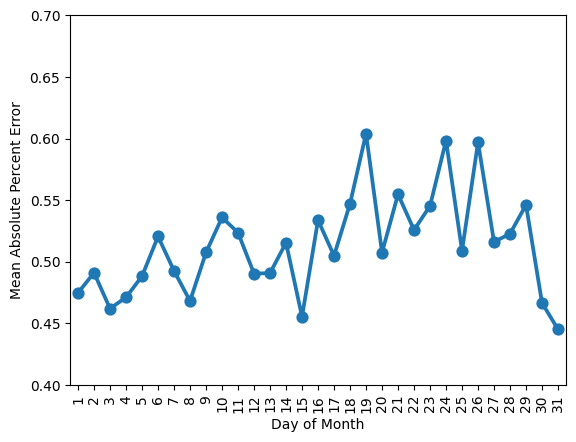

In [107]:
# MAPE by day of month
predictions['day_of_month'] = predictions['date'].dt.day
predictions.sort_values(by=['day_of_month','ticker'], inplace=True)

sns.pointplot(
    data=predictions,
    x='day_of_month',
    y='Absolute Percent Error',
    n_boot=1000,
    errorbar=None
)

plt.ylim(0.4, 0.7)
plt.ylabel('Mean Absolute Percent Error')
plt.xlabel('Day of Month')
plt.xticks(rotation=90)

plt.savefig('../../output/mape_by_day_of_month.png', dpi=600)